# An Empirical Comparison of Supervised and Self-Supervised Learning

In [2]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [3]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [4]:
conv_args = TrainArgs(batchsize = 10)

In [5]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.300
[epoch: 0, i:  1499] avg mini-batch loss: 2.294
[epoch: 0, i:  1999] avg mini-batch loss: 2.276
[epoch: 0, i:  2499] avg mini-batch loss: 2.226
[epoch: 0, i:  2999] avg mini-batch loss: 2.145
[epoch: 0, i:  3499] avg mini-batch loss: 2.060
[epoch: 0, i:  3999] avg mini-batch loss: 1.960
[epoch: 0, i:  4499] avg mini-batch loss: 1.914
[epoch: 0, i:  4999] avg mini-batch loss: 1.838
[epoch: 1, i:   499] avg mini-batch loss: 1.802
[epoch: 1, i:   999] avg mini-batch loss: 1.767
[epoch: 1, i:  1499] avg mini-batch loss: 1.742
[epoch: 1, i:  1999] avg mini-batch loss: 1.716
[epoch: 1, i:  2499] avg mini-batch loss: 1.669
[epoch: 1, i:  2999] avg mini-batch loss: 1.559
[epoch: 1, i:  3499] avg mini-batch loss: 1.496
[epoch: 1, i:  3999] avg mini-batch loss: 1.479
[epoch: 1, i:  4499] avg mini-batch loss: 1.458
[epoch: 1, i:  4999] avg mini-batc

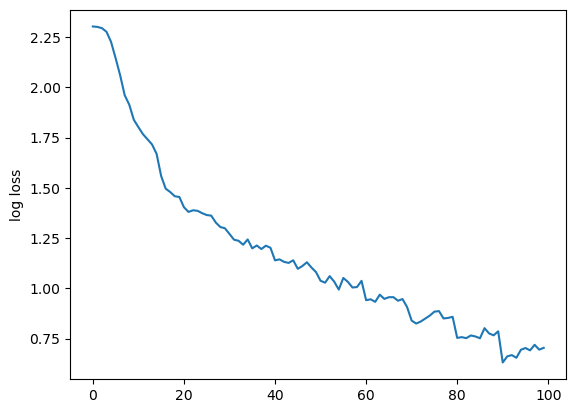

In [6]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [7]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 64.78 %


## Momentum Contrast

### Pre-Training the Encoder

In [8]:
encoder_args = TrainArgs(epochs = 20)

In [9]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.034496
Train Epoch: 2 	Loss: 0.013113
Train Epoch: 3 	Loss: 0.007207
Train Epoch: 4 	Loss: 0.005005
Train Epoch: 5 	Loss: 0.004053
Train Epoch: 6 	Loss: 0.003523
Train Epoch: 7 	Loss: 0.003208
Train Epoch: 8 	Loss: 0.002922
Train Epoch: 9 	Loss: 0.002716
Train Epoch: 10 	Loss: 0.002583
Train Epoch: 11 	Loss: 0.002451
Train Epoch: 12 	Loss: 0.002351
Train Epoch: 13 	Loss: 0.002275
Train Epoch: 14 	Loss: 0.002153
Train Epoch: 15 	Loss: 0.002054
Train Epoch: 16 	Loss: 0.001985
Train Epoch: 17 	Loss: 0.001981
Train Epoch: 18 	Loss: 0.001910
Train Epoch: 19 	Loss: 0.001842
Train Epoch: 20 	Loss: 0.001792


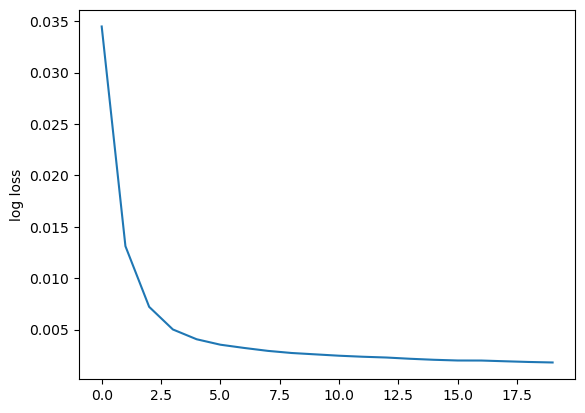

In [10]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [11]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [02:23<00:00, 69.70it/s]


In [12]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


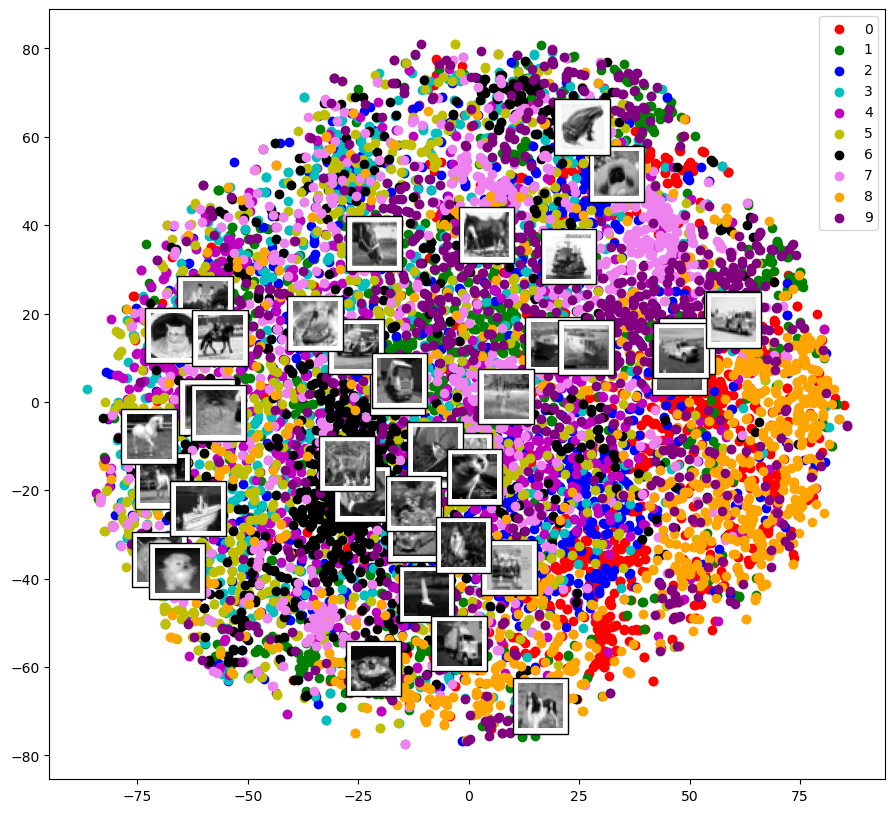

In [13]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [14]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [11:44<00:00, 70.93it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [02:21<00:00, 70.63it/s]


In [15]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [16]:
svm.score(X_test, y_test)

0.6392

### Multiple Runs

In [17]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [01:08<00:00, 72.73it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:13<00:00, 74.29it/s]


In [18]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [19]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.295
[epoch: 2, i:   499] avg mini-batch loss: 2.266
[epoch: 3, i:   499] avg mini-batch loss: 2.187
[epoch: 4, i:   499] avg mini-batch loss: 2.098
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.301
[epoch: 2, i:   499] avg mini-batch loss: 2.297
[epoch: 3, i:   499] avg mini-batch loss: 2.272
[epoch: 4, i:   499] avg mini-batch loss: 2.194
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.288
[epoch: 2, i:   499] avg mini-batch loss: 2.234
[epoch: 3, i:   499] avg mini-batch loss: 2.150
[epoch: 4, i:   499] avg mini-batch loss: 2.062
Files already downloaded and verified


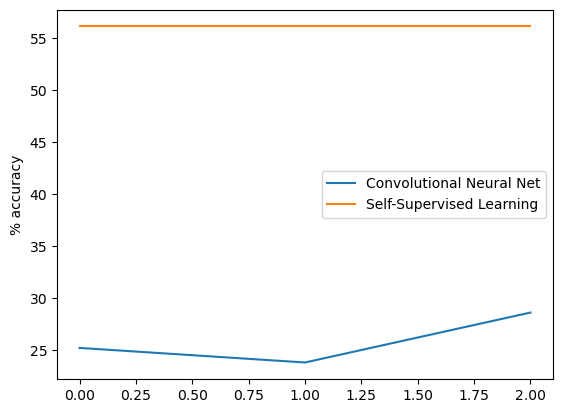

In [20]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [21]:
conv_errors

[25.2, 23.799999999999997, 28.599999999999998]

In [22]:
svm_errors

[0.561, 0.561, 0.561]

In [23]:
conv_errors

[25.2, 23.799999999999997, 28.599999999999998]